# 분류 (classification)

+ 머신러닝에서 회귀(regression)과 함께 가장 기본적인 데이타 분석 방법
+ 분류는 데이타가 어느 범주(category)에 해당하는지 판단하는 것이다.


## [1]이항 분류

+ 정답의 범주가 두 개인 분류 문제
+ ex) 와인의 상태에 따라 레드와인인지 화이트 와인인지 구별

               
<table>
<tr><th>속성</th><th>설명</th></tr>
<tr><td>fixed acidity</td><td>주석산(Tartaric acid)</td></tr>
<tr><td>volatile acidity</td><td>초산(Acetic acid)</td></tr>
<tr><td>citric acid</td><td>구연산</td></tr>
<tr><td>residual sugar</td><td>당도</td></tr>
<tr><td>chlorides</td><td>영화물(소금)</td></tr>
<tr><td>free sulfur dioxide</td><td>자유 이산화황(산화방지제, 방부제 역할)</td></tr>
<tr><td>total sulfur dioxide</td><td>총 이산화황</td></tr>
<tr><td>density</td><td>밀도</td></tr>
<tr><td>pH</td><td>산도</td></tr>
<tr><td>sulphates</td><td>황산칼륨</td></tr>
<tr><td>alcohol</td><td>알코올 도수</td></tr>
<tr><td>quality</td><td>품질(0~10)</td></tr>
<tr><td>type</td><td>종류(레드:1 , 화이트:0)</td></tr>
</table>

In [9]:
# (1-1) 와인 데이터셋 불러오기
import pandas as pd
wine = pd.read_csv('./dataset/wine.csv', header=None)
wine.columns = ['주석산','초산','구연산','당도','영화물','자유 이산화황',
               '총 이산화황','밀도','산도','황산칼륨','알코올 도수','품질',
               '종류']
print(wine.shape)
wine.tail()

(6497, 13)


,주석산,초산,구연산,당도,영화물,자유 이산화황,총 이산화황,밀도,산도,황산칼륨,알코올 도수,품질,종류
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


종류
0    4898
1    1599
Name: count, dtype: int64


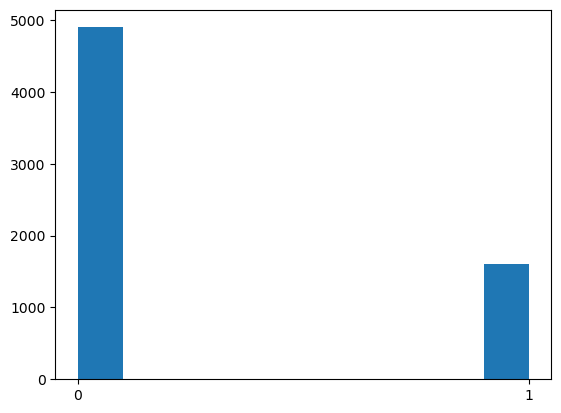

In [11]:
# [확인] 레드 와인과 화이트 와인 데이타 비율 확인

# type 속성의 값을 수로 확인
print(wine['종류'].value_counts())

# type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['종류'])
plt.xticks([0, 1])
plt.show()

In [13]:
# [확인] 데이터 요약 정보 확인
#     외부에서 불러온 데이터의 경우 어떤 값으로 구성되어 있는지 확인하고 데이타를 섞고 정규화를 해야 한다.
#     정규화 과정에서 데이터에 숫자가 아닌 값이 들어가며 에러을 유발한다.
#     모두 숫자형에 non-null 로 null가 존재하지 않음을 확인하다.

print(wine.info())
wine.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주석산      6497 non-null   float64
 1   초산       6497 non-null   float64
 2   구연산      6497 non-null   float64
 3   당도       6497 non-null   float64
 4   영화물      6497 non-null   float64
 5   자유 이산화황  6497 non-null   float64
 6   총 이산화황   6497 non-null   float64
 7   밀도       6497 non-null   float64
 8   산도       6497 non-null   float64
 9   황산칼륨     6497 non-null   float64
 10  알코올 도수   6497 non-null   float64
 11  품질       6497 non-null   int64  
 12  종류       6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


,주석산,초산,구연산,당도,영화물,자유 이산화황,총 이산화황,밀도,산도,황산칼륨,알코올 도수,품질,종류
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [15]:
# (1-2) 데이터 정규화

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

print(wine_norm.describe())
# 결과를 확인하면 min은 0이고 max는 1로 모두 0~1 사이의 데이타로 정규화가 된 것이다.

wine_norm.head()



               주석산           초산          구연산           당도          영화물  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      0.282257     0.173111     0.191948     0.074283     0.078129   
std       0.107143     0.109758     0.087541     0.072972     0.058195   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.214876     0.100000     0.150602     0.018405     0.048173   
50%       0.264463     0.140000     0.186747     0.036810     0.063123   
75%       0.322314     0.213333     0.234940     0.115031     0.093023   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           자유 이산화황       총 이산화황           밀도           산도         황산칼륨  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      0.102518     0.252868     0.146262     0.386435     0.174870   
std       0.061630     0.130235     0.057811     0.124641     0.083599   
min       0.000000     0.000000     0

,주석산,초산,구연산,당도,영화물,자유 이산화황,총 이산화황,밀도,산도,황산칼륨,알코올 도수,품질,종류
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0


In [17]:
# (1-3) 데이터 섞은 후 numpy array로 변환
#       df.sample(frac) : 전체 데이타프레임에서 frac 인수로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이타프레임을 만듬
#       frac=1 : 100% 즉 모든 데이터를 뽑아서 섞는 것과 동일한 효과이다.

import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
display(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
display(wine_np[:5])

# 첫번째 출력 결과에서  type을 보면 원래는 레드와인이 앞에 있어서 0.0만 나와야하지만 섞여서 나온다.

,주석산,초산,구연산,당도,영화물,자유 이산화황,총 이산화황,밀도,산도,황산칼륨,알코올 도수,품질,종류
4650,0.305785,0.166667,0.228916,0.124233,0.194352,0.166667,0.444700,0.192790,0.201550,0.196629,0.202899,0.333333,0.0
5155,0.082645,0.086667,0.126506,0.147239,0.046512,0.055556,0.244240,0.118180,0.728682,0.146067,0.608696,0.666667,0.0
3556,0.264463,0.026667,0.192771,0.101227,0.081395,0.072917,0.191244,0.182957,0.441860,0.089888,0.173913,0.500000,0.0
4119,0.305785,0.220000,0.138554,0.217791,0.074751,0.093750,0.387097,0.228841,0.356589,0.151685,0.246377,0.333333,0.0
3660,0.239669,0.100000,0.198795,0.018405,0.044850,0.076389,0.207373,0.103914,0.465116,0.101124,0.405797,0.500000,0.0


array([[0.30578512, 0.16666667, 0.22891566, 0.12423313, 0.19435216,
        0.16666667, 0.44470046, 0.19278967, 0.20155039, 0.19662921,
        0.20289855, 0.33333333, 0.        ],
       [0.08264463, 0.08666667, 0.12650602, 0.14723926, 0.04651163,
        0.05555556, 0.24423963, 0.11818007, 0.72868217, 0.14606742,
        0.60869565, 0.66666667, 0.        ],
       [0.26446281, 0.02666667, 0.19277108, 0.10122699, 0.08139535,
        0.07291667, 0.19124424, 0.18295739, 0.44186047, 0.08988764,
        0.17391304, 0.5       , 0.        ],
       [0.30578512, 0.22      , 0.13855422, 0.21779141, 0.07475083,
        0.09375   , 0.38709677, 0.22884133, 0.35658915, 0.15168539,
        0.24637681, 0.33333333, 0.        ],
       [0.23966942, 0.1       , 0.19879518, 0.01840491, 0.0448505 ,
        0.07638889, 0.20737327, 0.10391363, 0.46511628, 0.1011236 ,
        0.4057971 , 0.5       , 0.        ]])

In [24]:
# (1-4) train 데이터와 test 데이터로 분리
#         훈련 데이타 80% + 테스트 데이타 20%
#         기존 12개의 속성은 X가 되고 마지막에 새롭게 추가한 속성은 Y가 된다.
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

# tf.keras.utils.to_categorical : 정답 행렬을 one-hot encoding 방식으로 바꾼다
# one-hot encoding : 정답에 해당하는 인덱스의 값에는 1을 넣고, 나머지 인덱스는 모두 0으로 넣는 방식
# num_classes : 정답 클래스의 갯수
# 정답이 레드 와인(0.0)이라면 [1. 0.]이 되고 화이트 와인(1.0)이라면 [0. 1.]이 된다.
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.30578512 0.16666667 0.22891566 0.12423313 0.19435216 0.16666667
 0.44470046 0.19278967 0.20155039 0.19662921 0.20289855 0.33333333]
0.0
[0.32231405 0.59       0.06024096 0.02300613 0.17109635 0.03472222
 0.03686636 0.1771737  0.41860465 0.15730337 0.2173913  0.33333333]
1.0
[1. 0.]
[0. 1.]


In [26]:
# (2) 와인 데이터셋 분류 모델 생성하고 실행
#     회귀 모델과 비슷해 보이지만 마지막 레이어의 활성화 함수가 softmax이다.
#     마지막 레이어의 뉴런의 갯수가 2개인 것은 원-핫 인코딩으로 변환한 정답의 차원 수와 동일하다.
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# loss에 주로 사용하던 mse 대신 categorical_crossentropy 지정
# metrics=['accuracy'] : 분류 문제는 정확도(accuracy)로 퍼포먼스를 측정하기 때문에 정확도를 설정하는 것이 필수이다.

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,126 (8.30 KB)

 Trainable params: 2,126 (8.30 KB)

 Non-trainable params: 0 (0.00 B)

[참고] [ 크로스 엔트로피(cross entropy) ](https://wordbe.tistory.com/entry/ML-Cross-entropyCategorical-Binary%EC%9D%98-%EC%9D%B4%ED%95%B4)

[참고] [ softmax 간단한 이해 ](https://m.blog.naver.com/wideeyed/221021710286)

In [28]:
# (3) 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6600 - loss: 0.6278 - val_accuracy: 0.9715 - val_loss: 0.1868
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.1277 - val_accuracy: 0.9762 - val_loss: 0.0817
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9871 - loss: 0.0537 - val_accuracy: 0.9838 - val_loss: 0.0616
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 0.0439 - val_accuracy: 0.9846 - val_loss: 0.0573
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0385 - val_accuracy: 0.9877 - val_loss: 0.0528
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9889 - loss: 0.0323 - val_accuracy: 0.9900 - val_loss: 0.0488
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0327 - val_accuracy: 0.9862 - val_loss: 0.0562
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9889 - loss: 0.0365 - val_accuracy: 0.

[결과] 정확도가 100% 가까운 매우 좋은 결과를 유지하고 있다

Epoch 25/25
3897/3897 [==============================] - 0s 73us/sample - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.0443 - val_accuracy: 0.9885

    훈련 손실값 (loss)
    훈련 정확도 (acc)
    검증 손실값 (val_loss)
    검증 정확도 (val_acc)

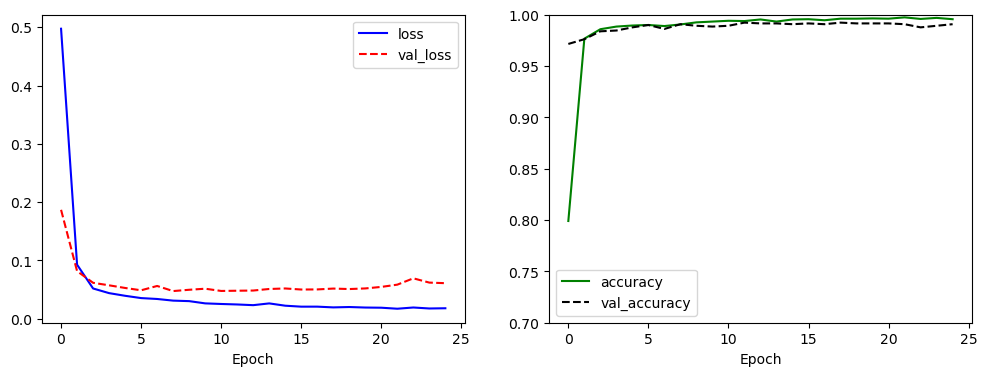

In [30]:
# [확인] 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [32]:
# (4) 분류 모델 평가
model.evaluate(test_X, test_Y)

# 정확도(accuracy)가 0.9931로 거의 오차 없이 레드와인와 화이트와인을 분류했다

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9979 - loss: 0.0151 


[0.01626928336918354, 0.9969230890274048]

In [40]:
print(train_X[1000])
print(train_Y[1000]) # 화이트와인

[0.16528926 0.12       0.10843373 0.00920245 0.03654485 0.13541667
 0.24884793 0.07113939 0.54263566 0.1011236  0.43478261 0.66666667]
[1. 0.]


In [44]:
# (5) 주어진 자료로 레드와인인지 화이트 와인인지 감별
# 정답이 레드 와인(0.0)이라면 [1. 0.]이 되고 화이트 와인(1.0)이라면 [0. 1.]이 된다.

x_values = ([0.16528926, 0.12, 0.10843373, 0.00920245, 0.03654485, 0.13541667,
 0.24884793, 0.07113939, 0.54263566, 0.1011236,  0.43478261, 0.66666667],)

import numpy as np
x_values = np.array(x_values)

y_pred = model.predict(x_values)
y_pred  # 화이트와인

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.9989675 , 0.00103246]], dtype=float32)